In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Load dataset in pandas dataframe
df = pd.read_csv("credit-card-holder-data.csv")

In [3]:
# Show several data's samples
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


This is a dataset for developing a customer segmentation. The dataset summarizes the usage behavior of active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- BALANCE: Balance amount left in their account to make purchases.
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
- PURCHASES: Amount of purchases made from account.
- ONEOFF_PURCHASES: Maximum purchase amount done in one-go (i.e., one-time payment for a purchase).
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment (i.e., multiple payments for a purchase). Observation: PURCHASES = ONEOFF_PURCHASE + INSTALLMENT_PURCHASES).
- CASH_ADVANCE: Cash in advance given by the user (a cash advance is when taking money out of the ATM using credit card instead of debit card or ATM card).
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid.
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advanced".
- PURCHASES_TRX: Number of purchase transactions made.
- CREDIT_LIMIT: Limit of Credit Card for user.
- PAYMENTS: Amount of payment done by user (i.e., payment for the use of credit card)
- MINIMUM_PAYMENTS: Minimum amount of payments made by user.
- PRC_FULL_PAYMENT: Percent of full payment paid by user.
- TENURE: Tenure of credit card service for user (i.e., how long (in months) you should have held the credit card before they will grant you credit).

# Basic Data Cleaning, Visualization and Analysis

## Data Cleaning

In [5]:
# Handling missing data
df.isna().sum()

,0
Unnamed: 0,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [6]:
# Removing redundant data's column ('Unnamed')
df = df.drop(columns=["Unnamed: 0"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
# Check data's duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# Descriptive statistic of data set
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Visualization & EDA

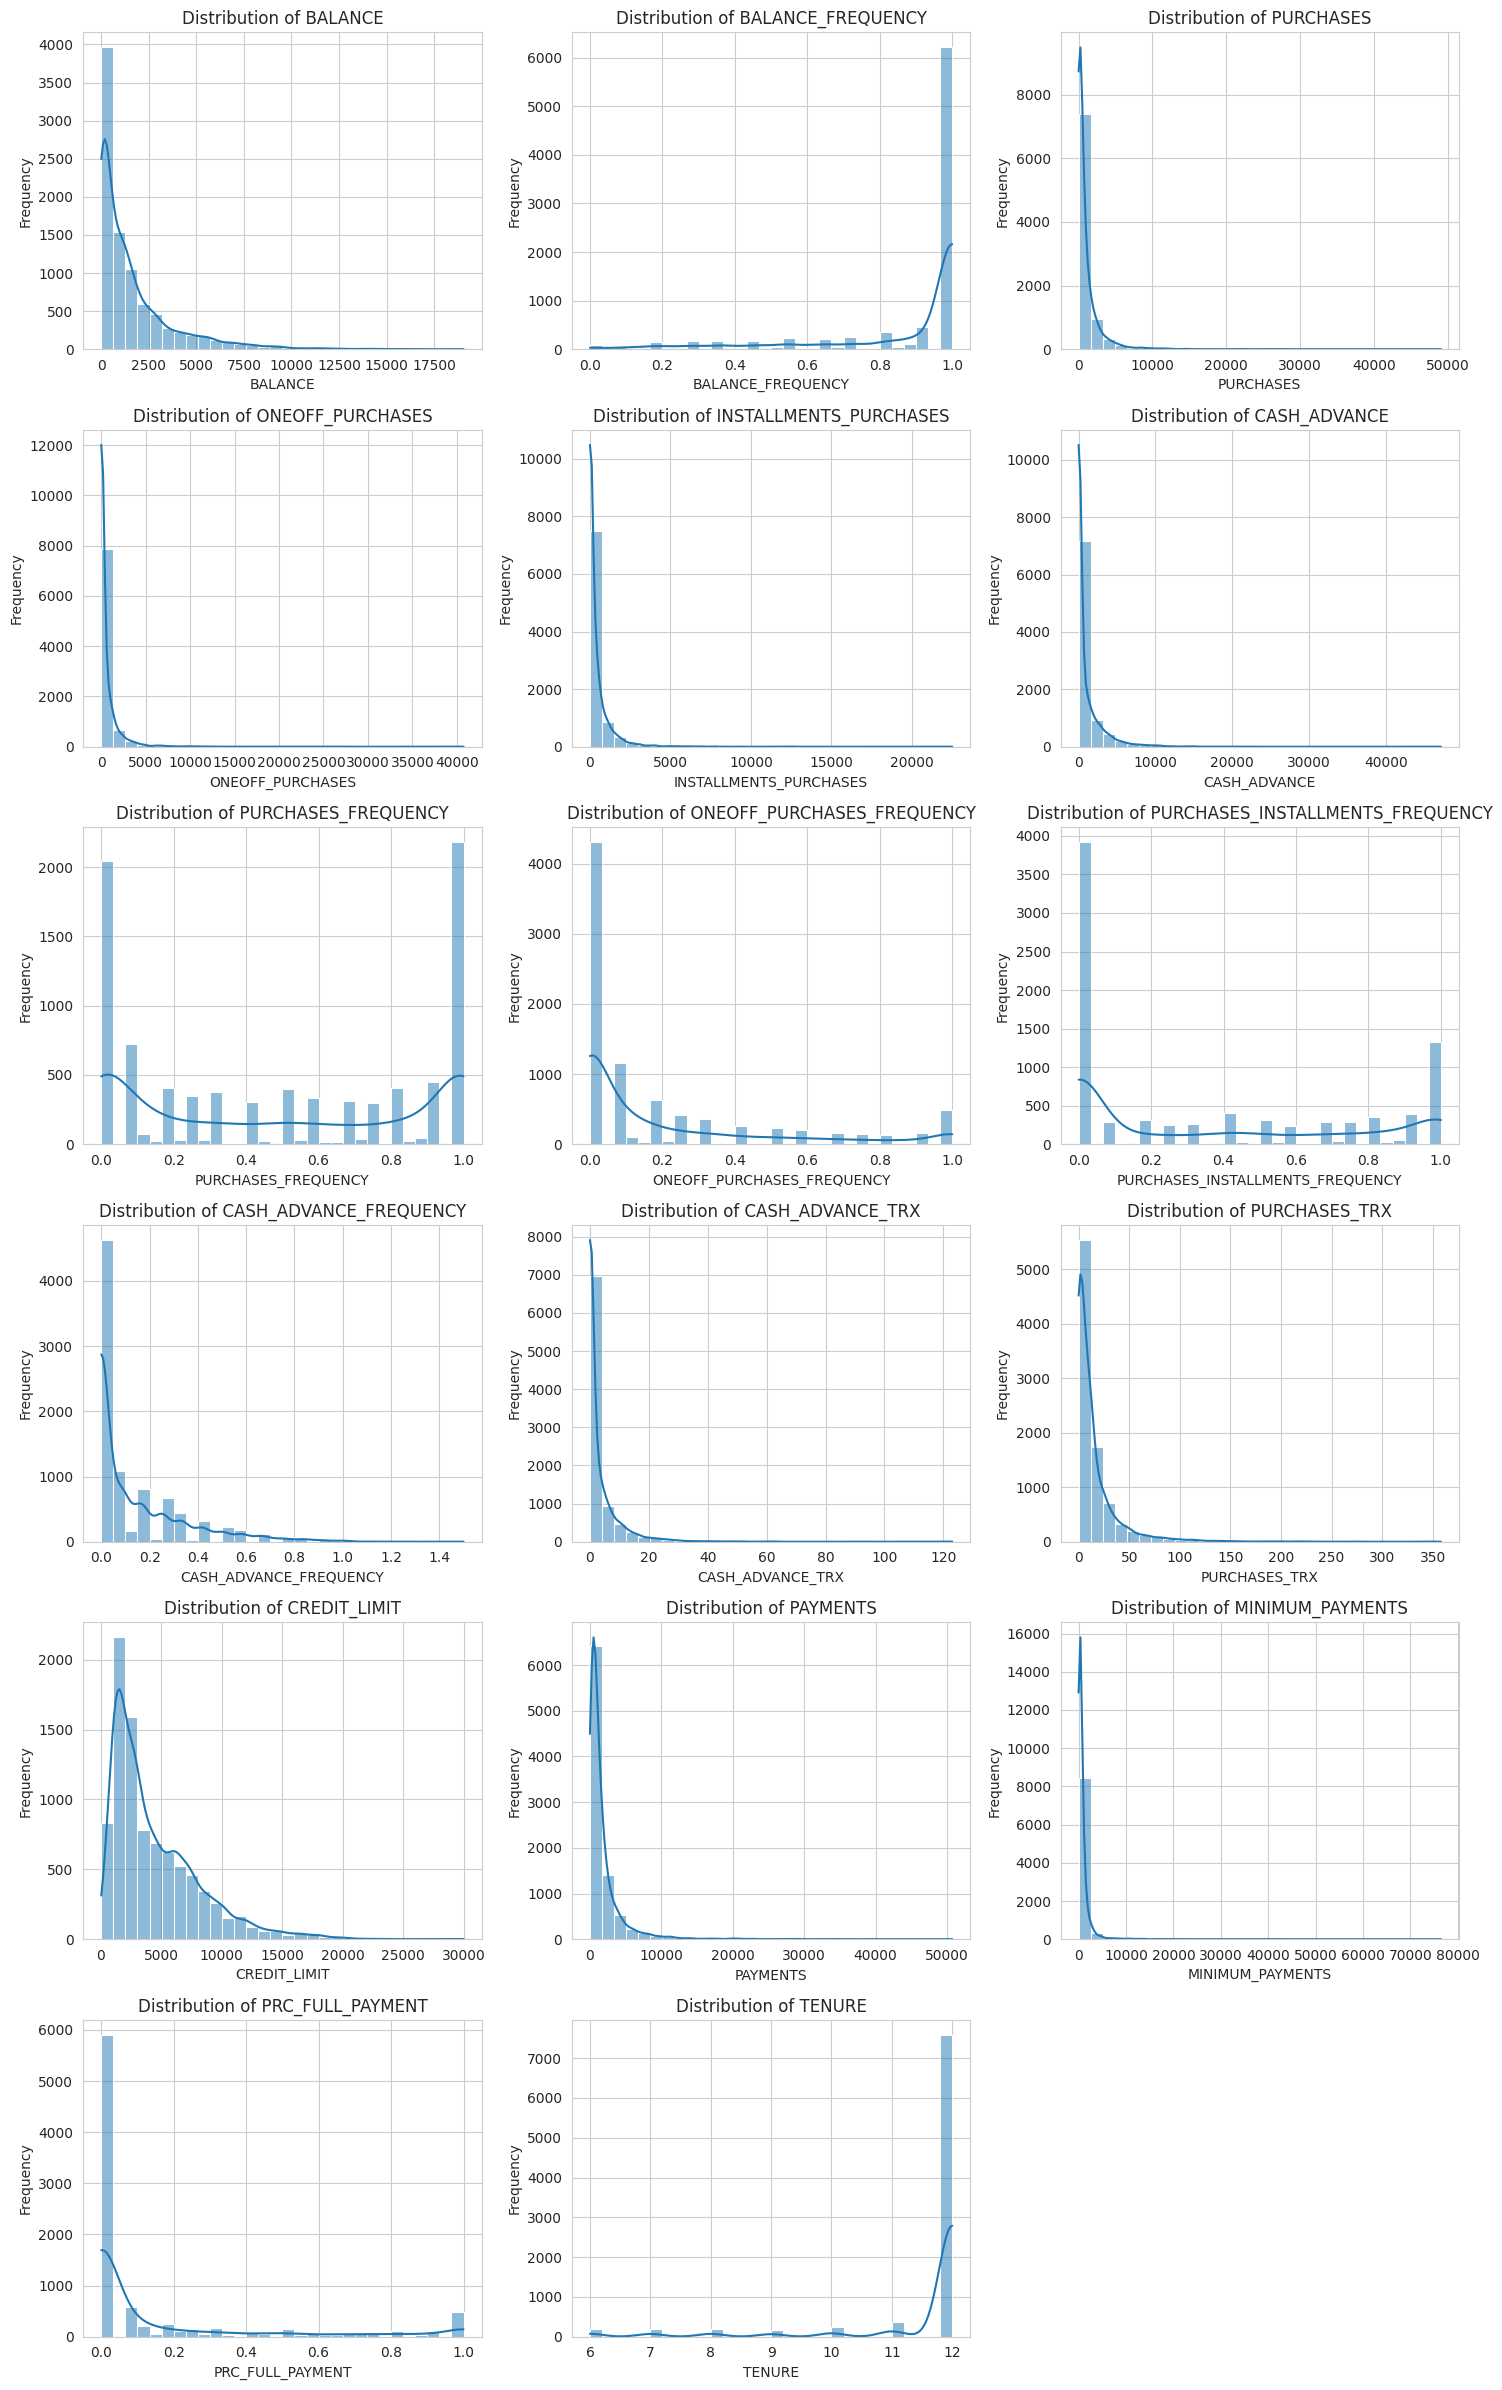

In [15]:
# Examine data's feature distribution
# The data set is cleaned now, we can proceed to basic visualization and analysis
# Using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style for seaborn plots
sns.set_style("whitegrid")

# List of all columns to visualize
columns_to_plot = df.columns.tolist()

# Calculate number of rows and columns for subplots dynamically
num_columns = len(columns_to_plot)
num_cols_per_row = 3 # You can adjust this number
num_rows = int(np.ceil(num_columns / num_cols_per_row))

# Create subplots for each feature
plt.figure(figsize=(num_cols_per_row * 5, num_rows * 4)) # Adjust figure size dynamically
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms above show the distribution for some of the key numerical features. For example:

*   **BALANCE:** The distribution is heavily skewed to the right, indicating that a large number of customers have lower balances, while a few have very high balances.
*   **PURCHASES:** Similar to balance, most customers have made lower purchase amounts, with a long tail for higher purchase values.
*   **CREDIT_LIMIT:** Shows a wider spread, but still a concentration at lower credit limits, with some customers having very high limits.

These plots help in understanding the spread, central tendency, and skewness of each feature, which is crucial for further analysis or model building.

In [19]:
# file: eda_seaborn_log_grid.py
"""
Grid EDA plots with automatic log1p for heavily skewed nonnegative features.
Designed for Google Colab / notebooks.
"""

from __future__ import annotations

def _is_frequency_series(s: pd.Series) -> bool:
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return False
    return (s.min() >= 0) and (s.max() <= 1)


def _is_discrete_series(s: pd.Series, max_unique: int = 20) -> bool:
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return False
    return s.nunique() <= max_unique


def _should_log1p(s: pd.Series, skew_threshold: float = 1.0) -> bool:
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return False
    if (s < 0).any():
        return False
    if _is_frequency_series(s):
        return False
    # Heavy-tail heuristic: skew + big max/median ratio
    skew = s.skew()
    med = float(s.median()) if len(s) else 0.0
    ratio = (float(s.max()) / med) if med > 0 else float("inf")
    return (abs(skew) >= skew_threshold) and (ratio >= 20)


def plot_feature_grid(
    df: pd.DataFrame,
    columns: list[str] | None = None,
    cols_per_row: int = 3,
    bins_default: int = 30,
    kde: bool = True,
    skew_threshold: float = 1.0,
    clip_quantiles: tuple[float, float] | None = (0.0, 0.99),
) -> None:
    """
    clip_quantiles is ONLY for visualization readability (e.g. (0.0, 0.99)).
    Set to None to disable clipping.
    """
    sns.set_style("whitegrid")

    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns.tolist()

    n = len(columns)
    rows = int(np.ceil(n / cols_per_row))
    plt.figure(figsize=(cols_per_row * 5, rows * 4))

    for i, col in enumerate(columns, start=1):
        s_raw = pd.to_numeric(df[col], errors="coerce")
        s = s_raw.copy()

        if clip_quantiles is not None:
            q_low, q_high = clip_quantiles
            lo = s.quantile(q_low) if q_low > 0 else None
            hi = s.quantile(q_high) if q_high < 1 else None
            if lo is not None:
                s = s.clip(lower=lo)
            if hi is not None:
                s = s.clip(upper=hi)

        ax = plt.subplot(rows, cols_per_row, i)

        # Decide plot type / transform
        if _is_frequency_series(s):
            sns.histplot(s, kde=kde, bins=20, ax=ax)
            ax.set_xlim(0, 1)
            ax.set_title(f"Distribution of {col} (0-1)")
        elif _is_discrete_series(s) and s.nunique(dropna=True) <= 15:
            # Better for TENURE-like columns
            sns.countplot(x=s.dropna().astype(int), ax=ax)
            ax.set_title(f"Count of {col}")
            ax.tick_params(axis="x", rotation=45)
        else:
            if _should_log1p(s, skew_threshold=skew_threshold):
                x = np.log1p(s.clip(lower=0))
                sns.histplot(x, kde=kde, bins=bins_default, ax=ax)
                ax.set_title(f"Distribution of ({col})")
                ax.set_xlabel(f"log1p({col})")
            else:
                sns.histplot(s, kde=kde, bins=bins_default, ax=ax)
                ax.set_title(f"Distribution of {col}")

        ax.set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

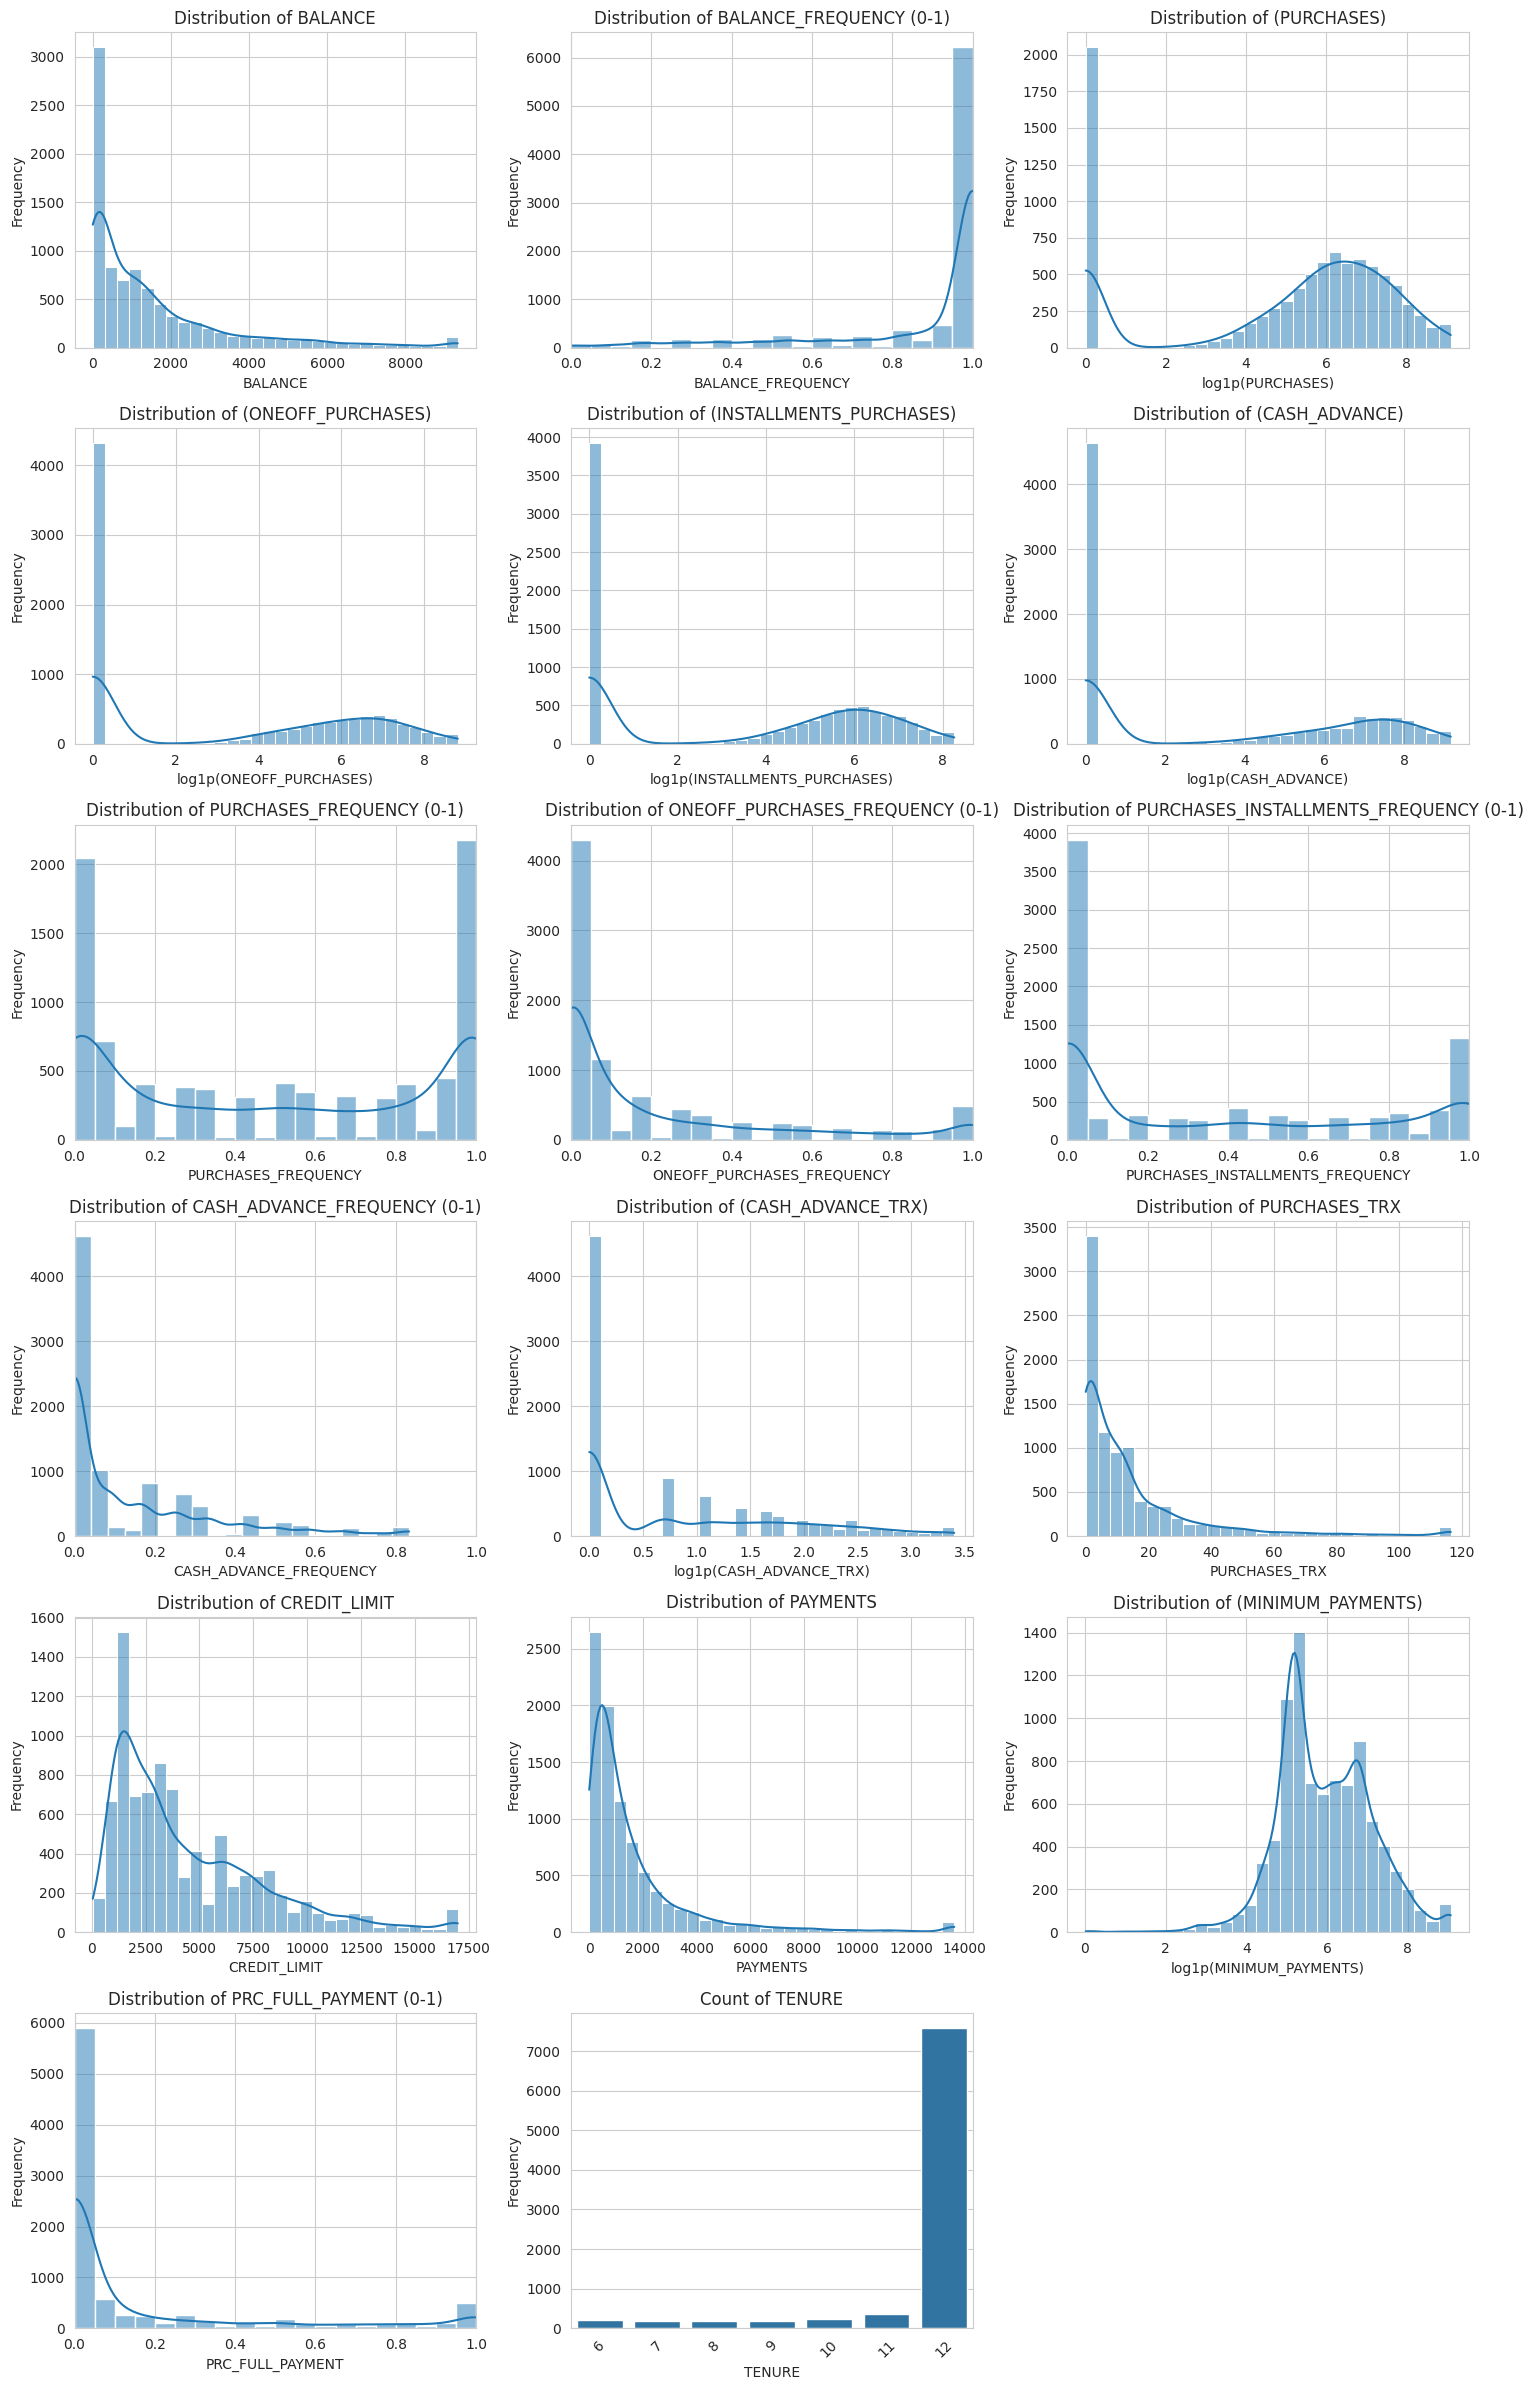

In [20]:
# --- Usage ---
columns_to_plot = df.columns.tolist()  # or df.select_dtypes(include=[np.number]).columns.tolist()
plot_feature_grid(df, columns=columns_to_plot, cols_per_row=3, bins_default=30, kde=True, skew_threshold=1.0)


## Correlation Analysis

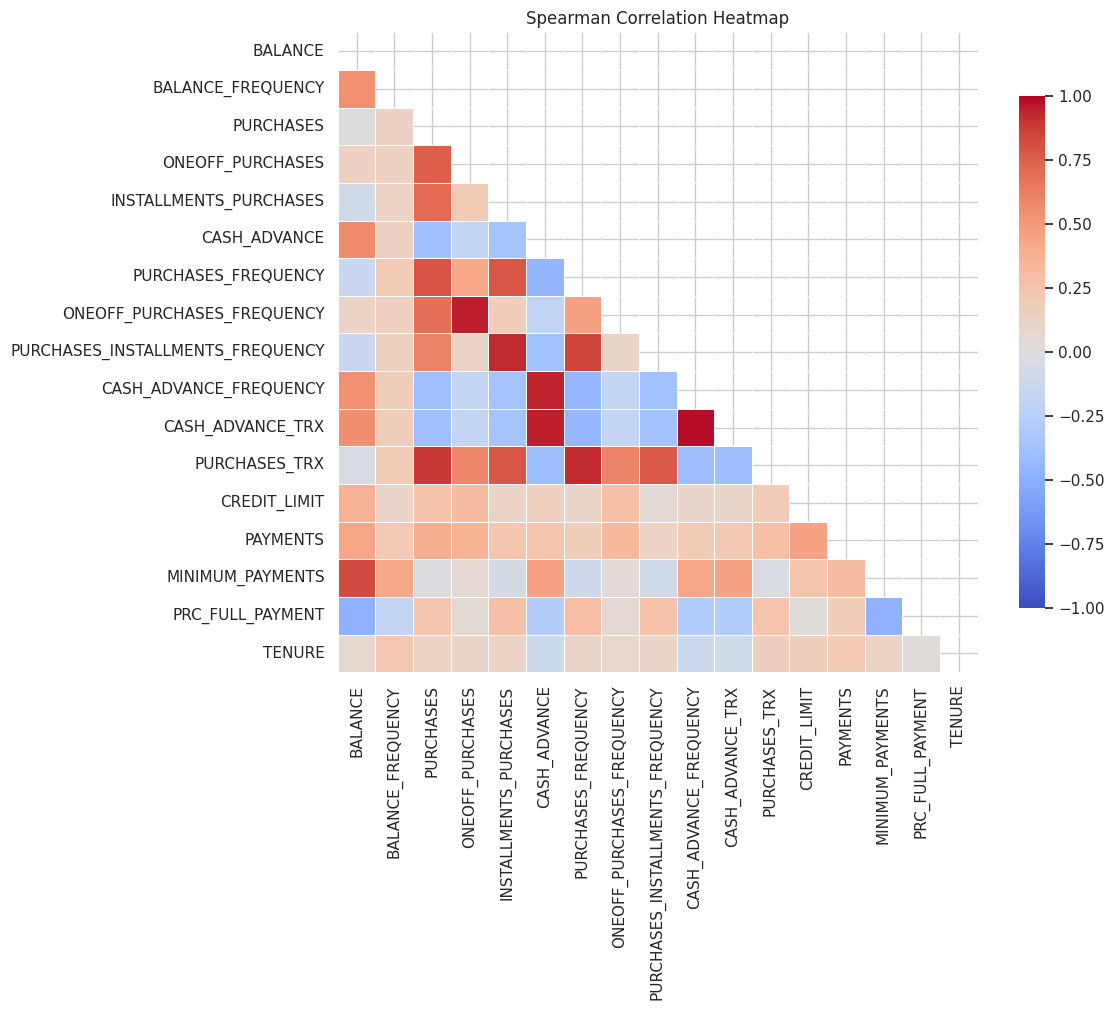

CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY              0.983414
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES                    0.952447
CASH_ADVANCE_TRX                  CASH_ADVANCE                        0.951837
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE                        0.940758
PURCHASES_TRX                     PURCHASES_FREQUENCY                 0.923591
PURCHASES_INSTALLMENTS_FREQUENCY  INSTALLMENTS_PURCHASES              0.923446
PURCHASES_TRX                     PURCHASES                           0.885175
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 0.851551
MINIMUM_PAYMENTS                  BALANCE                             0.825212
PURCHASES_FREQUENCY               PURCHASES                           0.794568
                                  INSTALLMENTS_PURCHASES              0.786466
PURCHASES_TRX                     INSTALLMENTS_PURCHASES              0.784309
                                  PURCHASES_INSTALLM

In [30]:
# Define a plotting correlation heatmap function
def plot_correlation_heatmap(
    data,
    method="spearman",
    figsize=(12, 10),
    max_annot_features=12,
):
    """
    Plot a correlation heatmap (numeric-only) with an upper-triangle mask.

    Parameters
    ----------
    data : pandas.DataFrame
        Input dataframe.
    method : str
        Correlation method: "spearman", "pearson", or "kendall".
    figsize : tuple[int, int]
        Figure size in inches.
    max_annot_features : int
        Only annotate cells if number of features is <= this threshold.
    """
    corr = data.corr(method=method, numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(
        corr,
        mask=mask,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        annot=(corr.shape[0] <= max_annot_features),
        fmt=".2f",
    )
    plt.title(f"{method.title()} Correlation Heatmap")
    plt.tight_layout()
    plt.show()

    return corr

# Define a filter of (dominant) correlated pair of features
def top_correlated_pairs(corr, top_n=20):
    """
    Return the top-N absolute correlation pairs (no duplicates, no self-pairs).
    """
    mask = np.triu(np.ones_like(corr, dtype=bool))
    abs_corr = corr.abs().where(~mask).stack().sort_values(ascending=False)
    abs_corr = abs_corr[
        abs_corr.index.get_level_values(0) != abs_corr.index.get_level_values(1)
    ]
    return abs_corr.head(top_n)


# Apply the Spearman correlation to our data's feature
corr_matrix = plot_correlation_heatmap(df, method="spearman")
print(top_correlated_pairs(corr_matrix, top_n=20))


## Data Preprocessing

In [31]:
# Create a replicated version of data set
data = df.copy()

In [33]:
# Import the Standardize library
from sklearn.preprocessing import StandardScaler
# Initilize the StandardScaler() object
scaler = StandardScaler()
# Standardize our data set
scaled_data = scaler.fit_transform(data)

In [34]:
# Install the yellowbrick library
!pip install yellowbrick

In [35]:
# Import KELbowVisualizer to use Elbow Method
from yellowbrick.cluster import KElbowVisualizer
# Import Kmeans library to use Kmeans Algorithm
from sklearn.cluster import KMeans

# Determine number of clusters using Elbow Method & KElbowVisualizer

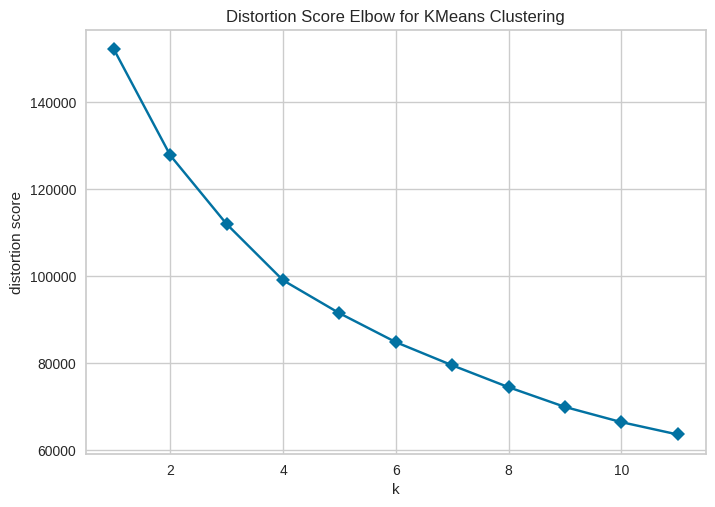

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
# Optional: global seed (doesn't hurt)
np.random.seed(42)

kmeans = KMeans(
    n_clusters=1,          # will be overridden by visualizer per k
    init="k-means++",
    n_init=20,             # more restarts => more stable curve
    random_state=42,        # key: makes runs reproducible
    algorithm="lloyd",
)

elbow_method = KElbowVisualizer(
    kmeans,
    k=(1, 12),
    timings=False,
    locate_elbow=False,
    metric="distortion",    # explicit; default is often distortion anyway
)

elbow_method.fit(scaled_data)
elbow_method.show()

# Training K-Means Clustering Model

In [58]:
from sklearn.metrics import silhouette_score
import numpy as np

# Train K-Means with K=4 (more stable + reproducible)
kmeans_model = KMeans(
    n_clusters=4,
    init="k-means++",
    n_init=20,
    random_state=42,
    algorithm="lloyd",
)

# Fit and get labels in one step
labels = kmeans_model.fit_predict(scaled_data)

# Same as labels above (kept for reference)
# labels = kmeans_model.labels_

# Basic checks
unique_labels, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique_labels, counts)))
print("Inertia:", kmeans_model.inertia_)

# Optional quality metric (only valid for k>=2)
print("Silhouette:", silhouette_score(scaled_data, labels))

Cluster sizes: {np.int32(0): np.int64(3367), np.int32(1): np.int64(409), np.int32(2): np.int64(1198), np.int32(3): np.int64(3976)}
Inertia: 99073.93826774767
Silhouette: 0.19760744927207083



Output Interpretation (K = 4) (expected 4 different groups of customers' behavior):

- **Cluster sizes:** 0 (3367, ~38%), 1 (409, ~5%), 2 (1198, ~13%), 3 (3976, ~44%). This suggests two dominant customer groups and one small niche/outlier-like segment.

- **Inertia (99073.94):** within-cluster compactness on the scaled feature space; the absolute value isn’t meaningful alone—use it mainly to compare different K or preprocessing.

- **Silhouette (0.198):** weak-to-moderate separation, meaning clusters overlap noticeably; interpret clusters via feature profiling (means/medians per cluster) rather than expecting sharply separated groups.

# Principal Component Analysis

In [59]:
# Import PCA library
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(scaled_data)

explained_ratio = pca_full.explained_variance_ratio_
cumulative_ratio = np.cumsum(explained_ratio)

print("Explained variance ratio per PC:\n", explained_ratio)
print("\nCumulative explained variance ratio:\n", cumulative_ratio)

Explained variance ratio per PC:
 [2.72900372e-01 2.03019913e-01 8.79197945e-02 7.47997502e-02
 6.26279204e-02 5.75021129e-02 4.88723464e-02 4.25748554e-02
 3.82880445e-02 3.08000623e-02 2.37189739e-02 1.77363237e-02
 1.42649185e-02 1.21736915e-02 1.01298988e-02 2.67033632e-03
 6.85223491e-07]

Cumulative explained variance ratio:
 [0.27290037 0.47592029 0.56384008 0.63863983 0.70126775 0.75876986
 0.80764221 0.85021707 0.88850511 0.91930517 0.94302415 0.96076047
 0.97502539 0.98719908 0.99732898 0.99999931 1.        ]


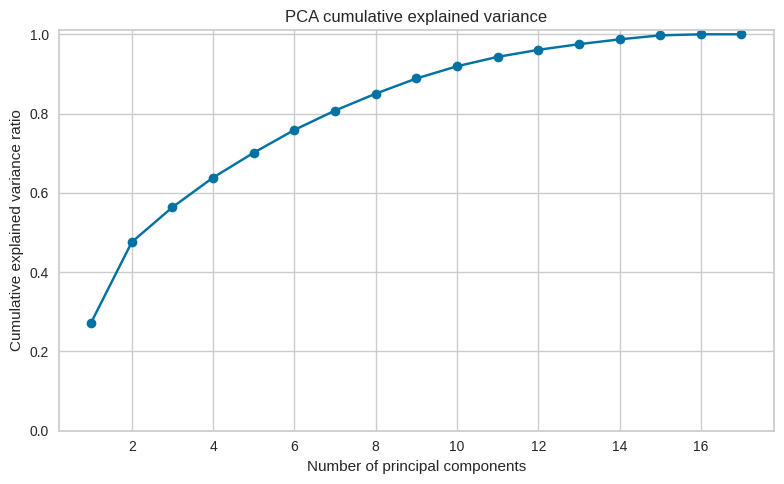

In [60]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(
    np.arange(1, len(cumulative_ratio) + 1),
    cumulative_ratio,
    marker="o",
)
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance ratio")
plt.title("PCA cumulative explained variance")
plt.ylim(0, 1.01)
plt.grid(True)
plt.tight_layout()
plt.show()


Selected n_components=12 to reach 95% variance.


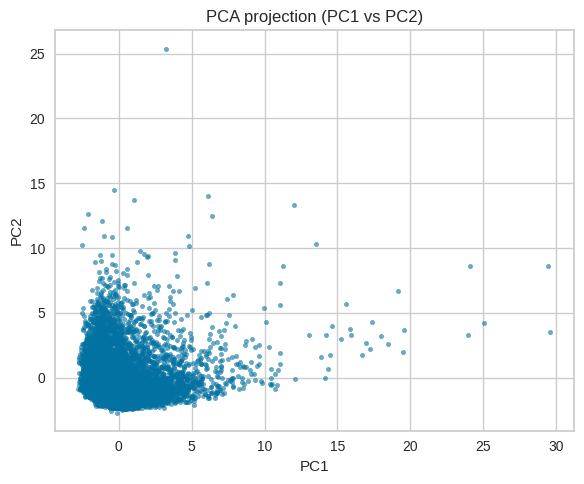

In [61]:
variance_threshold = 0.95
n_components = int(np.searchsorted(cumulative_ratio, variance_threshold) + 1)
print(f"\nSelected n_components={n_components} to reach {variance_threshold:.0%} variance.")

pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Optional: visualize 2D PCA projection if >=2 PCs
if pca_data.shape[1] >= 2:
    plt.figure(figsize=(6, 5))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], s=10, alpha=0.6)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA projection (PC1 vs PC2)")
    plt.tight_layout()
    plt.show()


In [62]:
k = 4
kmeans_model = KMeans(
    n_clusters=k,
    init="k-means++",
    n_init=20,
    random_state=42,
    algorithm="lloyd",
)

labels = kmeans_model.fit_predict(pca_data)

unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster sizes:", dict(zip(unique_labels, counts)))
print("Inertia (PCA space):", kmeans_model.inertia_)

# Silhouette: valid for k>=2
sil = silhouette_score(pca_data, labels)
print("Silhouette (PCA space):", sil)


Cluster sizes: {np.int32(0): np.int64(3348), np.int32(1): np.int64(402), np.int32(2): np.int64(3989), np.int32(3): np.int64(1211)}
Inertia (PCA space): 93160.74128427017
Silhouette (PCA space): 0.20782000951614937


## 2-dimensional PCA

2D PCA variance explained: 0.4759


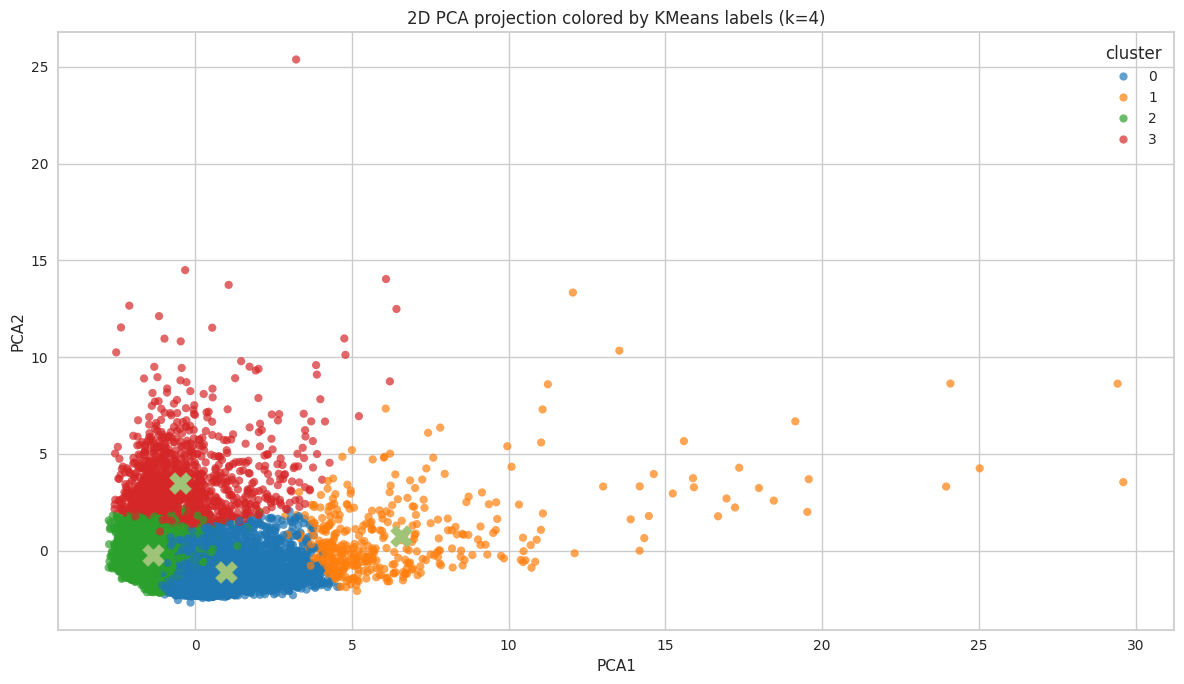

In [73]:
# 2D-PCA for visualization ONLY
# -----------------------------
pca_vis = PCA(n_components=2, svd_solver="full")
pca2_data = pca_vis.fit_transform(scaled_data)

pca2_df = pd.DataFrame(pca2_data, columns=["PCA1", "PCA2"])
pca2_df["cluster"] = labels

explained_2d = pca_vis.explained_variance_ratio_.sum()
print(f"2D PCA variance explained: {explained_2d:.4f}")

# Optional: cluster centers (mean point in 2D projection)
centers_2d = (
    pca2_df.groupby("cluster")[["PCA1", "PCA2"]]
    .mean()
    .reset_index()
)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.scatterplot(
    data=pca2_df,
    x="PCA1",
    y="PCA2",
    hue="cluster",
    palette="tab10",
    s=35,
    alpha=0.7,
    linewidth=0,
)

# Overlay 2D cluster means for readability
plt.scatter(
    centers_2d["PCA1"],
    centers_2d["PCA2"],
    marker="X",
    s=250,
)

plt.title(f"2D PCA projection colored by KMeans labels (k={k})")
plt.tight_layout()
plt.show()


## 3-dimensional PCA

In [74]:
# 3D PCA for visualization ONLY
pca_vis3 = PCA(n_components=3, svd_solver="full")
pca3_data = pca_vis3.fit_transform(scaled_data)

pca3_df = pd.DataFrame(pca3_data, columns=["pca_1", "pca_2", "pca_3"])
pca3_df["cluster"] = labels

explained_3d = float(pca_vis3.explained_variance_ratio_.sum())
print(f"3D PCA variance explained: {explained_3d:.4f}")

# Cluster centers in the 3D projection (means of points per cluster)
centers_3d = (
    pca3_df.groupby("cluster")[["pca_1", "pca_2", "pca_3"]]
    .mean()
    .reset_index()
)

3D PCA variance explained: 0.5638


/tmp/ipython-input-2561357910.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(clusters))  # categorical colors


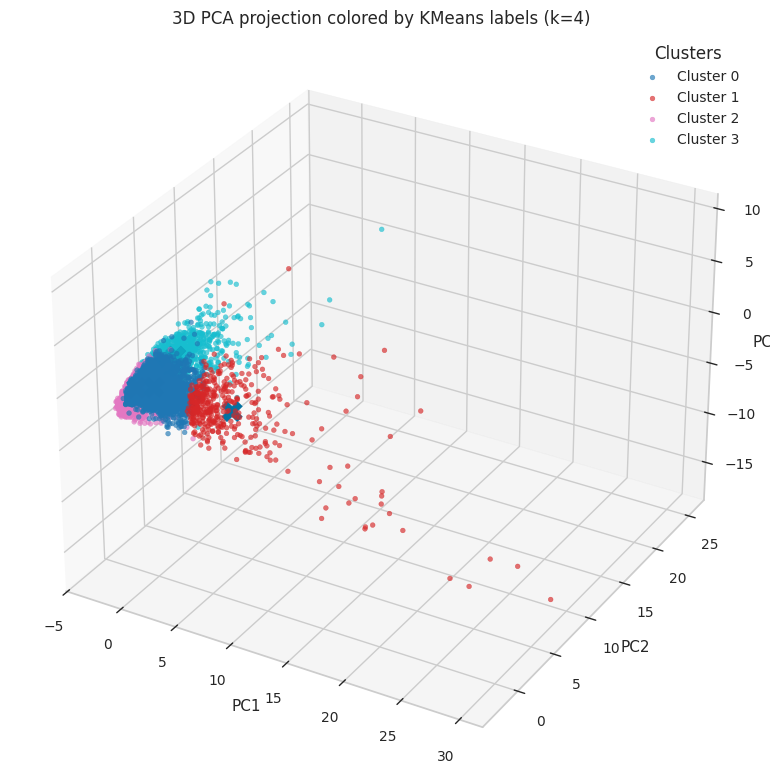

In [75]:
# 3) Plot 3D scatter with legend + centers
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

clusters = np.sort(pca3_df["cluster"].unique())
cmap = plt.cm.get_cmap("tab10", len(clusters))  # categorical colors

for idx, c in enumerate(clusters):
    pts = pca3_df[pca3_df["cluster"] == c]
    ax.scatter(
        pts["pca_1"],
        pts["pca_2"],
        pts["pca_3"],
        s=12,
        alpha=0.65,
        color=cmap(idx),
        label=f"Cluster {c}",
    )

# Overlay cluster centers
ax.scatter(
    centers_3d["pca_1"],
    centers_3d["pca_2"],
    centers_3d["pca_3"],
    s=220,
    marker="X",
)

ax.set_title(f"3D PCA projection colored by KMeans labels (k={k})")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(loc="upper right", title="Clusters")

plt.tight_layout()
plt.show()

# Feature Analyzation & Characteristic Define

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def add_cluster_labels(dataframe, labels, label_col="cluster"):
    """
    Return a copy of dataframe with a cluster label column added.
    """
    df_labeled = dataframe.copy()
    df_labeled[label_col] = np.asarray(labels)
    return df_labeled


def show_random_samples_per_cluster(df_labeled, label_col="cluster", n=5, random_state=42):
    """
    Display up to n random samples per cluster safely.
    """
    for cluster_id in sorted(df_labeled[label_col].unique()):
        cluster_df = df_labeled[df_labeled[label_col] == cluster_id]
        take = min(n, len(cluster_df))
        print(f"\nCluster {cluster_id} (n={len(cluster_df)})")
        if take == 0:
            print("No samples.")
            continue
        display(cluster_df.sample(take, random_state=random_state))


def cluster_size_table(df_labeled, label_col="cluster"):
    """
    Return size and percentage per cluster.
    """
    counts = df_labeled[label_col].value_counts().sort_index()
    pct = (counts / counts.sum() * 100).round(2)
    return pd.DataFrame({"count": counts, "percent": pct})


def cluster_summary_tables(df_labeled, label_col="cluster"):
    """
    Return mean and median tables for numeric features.
    """
    num_cols = df_labeled.select_dtypes(include=[np.number]).columns.tolist()
    if label_col in num_cols:
        num_cols.remove(label_col)

    group = df_labeled.groupby(label_col)[num_cols]
    mean_tbl = group.mean()
    median_tbl = group.median()
    std_tbl = group.std(ddof=0)

    return mean_tbl, median_tbl, std_tbl


def standardized_mean_differences(mean_tbl, overall_mean, overall_std):
    """
    Z-delta: (cluster_mean - overall_mean) / overall_std
    """
    safe_std = overall_std.replace(0, np.nan)
    z_delta = (mean_tbl - overall_mean) / safe_std
    return z_delta


def top_features_by_cluster(z_delta, top_n=8):
    """
    Return top positive and top negative features per cluster based on z-delta.
    """
    out = {}
    for cluster_id in z_delta.index:
        row = z_delta.loc[cluster_id].dropna()
        top_pos = row.sort_values(ascending=False).head(top_n)
        top_neg = row.sort_values(ascending=True).head(top_n)
        out[cluster_id] = {
            "top_positive": top_pos,
            "top_negative": top_neg,
        }
    return out


def plot_top_feature_heatmap(z_delta, top_features=15, figsize=(12, 6)):
    """
    Heatmap of most differentiating features across clusters.
    Picks features with the highest max abs z-delta across clusters.
    """
    feature_strength = z_delta.abs().max(axis=0).sort_values(ascending=False)
    chosen = feature_strength.head(top_features).index.tolist()
    z_small = z_delta[chosen]

    plt.figure(figsize=figsize)
    sns.heatmap(
        z_small,
        cmap="coolwarm",
        center=0,
        linewidths=0.5,
        cbar_kws={"label": "standardized mean difference (z)"},
    )
    plt.title("Top differentiating features by cluster (z-delta)")
    plt.xlabel("Feature")
    plt.ylabel("Cluster")
    plt.tight_layout()
    plt.show()


def plot_cluster_profile_bars(
    z_delta,
    cluster_id,
    top_n=10,
    figsize=(10, 5),
):
    """
    Bar plot for one cluster: top +/- features by z-delta.
    """
    row = z_delta.loc[cluster_id].dropna()
    top = pd.concat(
        [row.sort_values().head(top_n), row.sort_values(ascending=False).head(top_n)]
    )
    top = top[~top.index.duplicated(keep="first")].sort_values()

    plt.figure(figsize=figsize)
    top.plot(kind="barh")
    plt.title(f"Cluster {cluster_id}: most distinguishing features (z-delta)")
    plt.xlabel("standardized mean difference (z)")
    plt.tight_layout()
    plt.show()



Cluster 0 (n=3348)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
5058,180.750232,1.000000,266.64,0.00,266.64,95.285453,1.000000,0.0,1.000000,0.083333,1,12,3500.0,1172.975952,175.622760,0.545455,12,0
7226,189.434859,1.000000,500.09,0.00,500.09,0.000000,0.916667,0.0,0.916667,0.000000,0,24,3000.0,521.673011,171.538499,0.000000,12,0
4272,5693.979714,1.000000,1338.72,1338.72,0.00,0.000000,1.000000,1.0,0.000000,0.000000,0,13,9500.0,1753.988494,1290.972218,0.000000,12,0
3403,246.688528,0.909091,297.96,0.00,297.96,0.000000,0.916667,0.0,0.916667,0.000000,0,11,1000.0,1333.301174,221.511130,0.000000,12,0
8071,97.299991,1.000000,427.67,0.00,427.67,0.000000,0.666667,0.0,0.666667,0.000000,0,8,2500.0,557.777752,173.099027,0.000000,12,0



Cluster 1 (n=402)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4456,289.512368,1.0,4185.94,898.14,3287.80,0.000000,1.0,0.666667,1.000000,0.000000,0,90,6000.0,3836.068440,175.475265,0.909091,12,1
4326,722.689568,1.0,6493.25,6454.25,39.00,0.000000,1.0,1.000000,0.083333,0.000000,0,38,3200.0,5777.820302,221.688527,0.750000,12,1
312,515.904786,1.0,5359.02,2399.78,2959.24,0.000000,1.0,1.000000,1.000000,0.000000,0,60,6000.0,0.000000,864.206542,0.000000,12,1
2970,5968.583246,1.0,22381.97,19150.02,3231.95,0.000000,1.0,1.000000,0.583333,0.000000,0,87,14500.0,20343.286810,1966.191831,0.000000,12,1
782,9164.724752,1.0,3407.69,2074.16,1333.53,2063.860557,1.0,0.833333,1.000000,0.166667,5,77,9500.0,0.000000,864.206542,0.000000,12,1



Cluster 2 (n=3989)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3699,148.511058,0.363636,562.24,349.00,213.24,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,9000.0,18.208604,74.163860,0.0,12,2
5007,0.000000,0.000000,66.75,0.00,66.75,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,4000.0,0.000000,864.206542,0.0,12,2
4209,432.860083,1.000000,128.32,128.32,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,4750.0,239.784988,297.228184,0.0,12,2
2202,1166.500558,1.000000,73.80,0.00,73.80,595.036388,0.333333,0.000000,0.333333,0.416667,6,4,2000.0,514.586639,324.359117,0.0,12,2
4365,1992.650296,1.000000,20.00,0.00,20.00,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,7500.0,2069.263442,539.152810,0.0,12,2



Cluster 3 (n=1211)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
577,7975.191430,1.000000,1142.15,1017.65,124.5,2652.115823,0.500000,0.333333,0.25,0.250000,3,10,9000.0,2079.521171,2902.185150,0.000000,12,3
4962,1184.434511,0.818182,99.80,99.80,0.0,3445.519550,0.083333,0.083333,0.00,0.583333,48,2,3000.0,3497.925485,512.876256,0.111111,12,3
5754,6241.937842,1.000000,0.00,0.00,0.0,11071.933640,0.000000,0.000000,0.00,0.333333,4,0,12000.0,12181.031390,1475.203723,0.090909,12,3
615,8900.194109,1.000000,0.00,0.00,0.0,4849.693752,0.000000,0.000000,0.00,0.916667,52,0,12000.0,2430.864139,2452.882838,0.000000,12,3
3930,5795.166009,1.000000,0.00,0.00,0.0,7363.303617,0.000000,0.000000,0.00,0.250000,3,0,12500.0,7570.031897,1489.464244,0.000000,12,3


,count,percent
cluster,,
0,3348,37.41
1,402,4.49
2,3989,44.57
3,1211,13.53


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,901.535,0.937,1245.559,599.418,646.417,213.894,0.887,0.299,0.714,0.043,0.799,22.299,4236.416,1342.417,653.965,0.270,11.599
1,3570.146,0.987,7758.201,5146.105,2613.589,650.265,0.946,0.739,0.786,0.070,2.070,89.545,9715.174,7355.672,1990.290,0.291,11.950
2,1002.105,0.788,272.312,210.649,61.929,586.930,0.174,0.087,0.083,0.114,2.091,2.961,3265.367,969.940,577.037,0.078,11.444
3,4583.910,0.969,498.348,319.117,179.315,4493.895,0.285,0.138,0.183,0.482,14.227,7.589,7523.332,3460.905,2017.569,0.035,11.390


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,339.985,1.0,900.00,171.555,454.10,0.000,1.000,0.143,0.833,0.000,0.0,17.0,3000.0,947.413,197.418,0.083,12.0
1,2499.590,1.0,5888.54,3727.580,1873.14,0.000,1.000,0.833,1.000,0.000,0.0,79.0,9000.0,5508.210,725.172,0.000,12.0
2,749.128,1.0,81.10,0.000,0.00,109.600,0.083,0.000,0.000,0.083,1.0,1.0,2500.0,534.718,308.892,0.000,12.0
3,4241.865,1.0,81.84,0.000,0.00,3631.844,0.083,0.000,0.000,0.500,11.0,1.0,7000.0,1943.319,1307.447,0.000,12.0


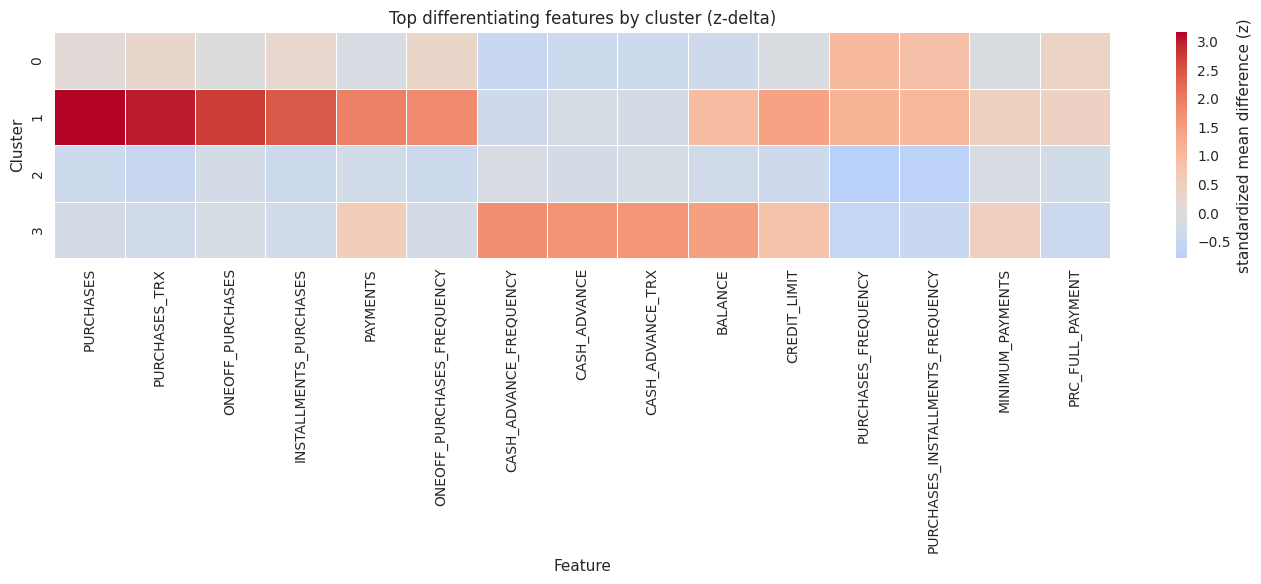

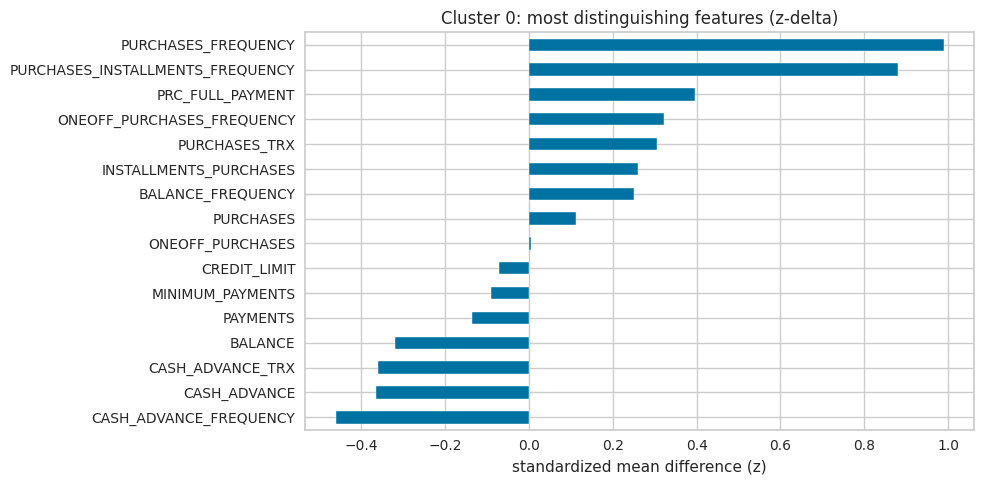

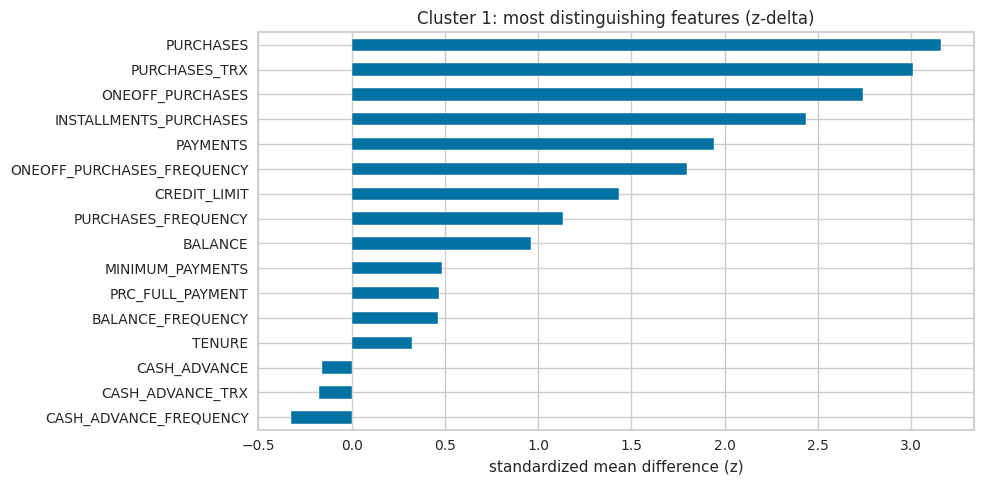

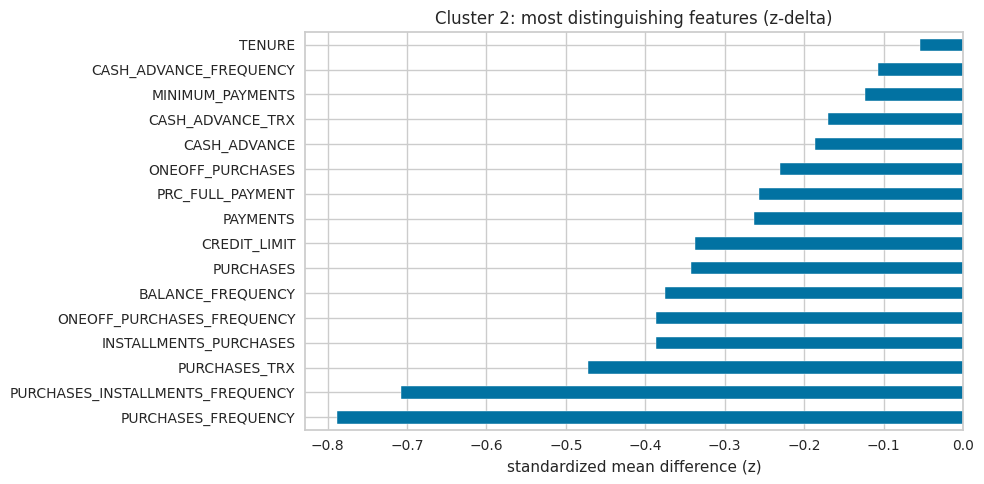

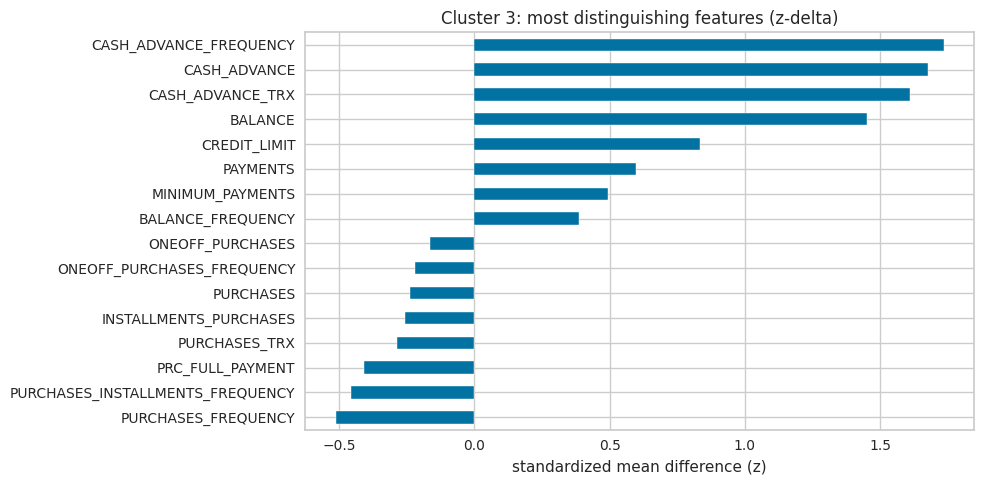


Cluster 0 top + features:
PURCHASES_FREQUENCY                 0.988885
PURCHASES_INSTALLMENTS_FREQUENCY    0.880681
PRC_FULL_PAYMENT                    0.397295
ONEOFF_PURCHASES_FREQUENCY          0.322755
PURCHASES_TRX                       0.305310
INSTALLMENTS_PURCHASES              0.260260
Name: 0, dtype: float64
Cluster 0 top - features:
CASH_ADVANCE_FREQUENCY   -0.460532
CASH_ADVANCE             -0.364788
CASH_ADVANCE_TRX         -0.359034
BALANCE                  -0.318504
PAYMENTS                 -0.134971
MINIMUM_PAYMENTS         -0.090215
Name: 0, dtype: float64

Cluster 1 top + features:
PURCHASES                     3.161689
PURCHASES_TRX                 3.010708
ONEOFF_PURCHASES              2.743512
INSTALLMENTS_PURCHASES        2.435642
PAYMENTS                      1.942217
ONEOFF_PURCHASES_FREQUENCY    1.798013
Name: 1, dtype: float64
Cluster 1 top - features:
CASH_ADVANCE_FREQUENCY   -0.326359
CASH_ADVANCE_TRX         -0.172792
CASH_ADVANCE             -0.156699
TEN

In [79]:
# labels = kmeans_model.labels_   # or labels from fit_predict
labels = np.asarray(kmeans_model.labels_)

df_labeled = add_cluster_labels(data, labels, label_col="cluster")

# Samples per cluster (safer sampling)
show_random_samples_per_cluster(df_labeled, label_col="cluster", n=5, random_state=42)

# Size table
sizes = cluster_size_table(df_labeled, label_col="cluster")
display(sizes)

# Mean/median summaries (numeric only)
mean_tbl, median_tbl, std_tbl = cluster_summary_tables(df_labeled, label_col="cluster")
display(mean_tbl.round(3))
display(median_tbl.round(3))

# Standardized differences vs overall (best for interpreting segments)
overall_mean = df_labeled.drop(columns=["cluster"]).mean(numeric_only=True)
overall_std = df_labeled.drop(columns=["cluster"]).std(numeric_only=True, ddof=0)
z_delta = standardized_mean_differences(mean_tbl, overall_mean, overall_std)

# Visualize the main differences clearly
plot_top_feature_heatmap(z_delta, top_features=15, figsize=(14, 6))

# Optional: per-cluster bar profiles (much clearer than plotting all features)
for cid in sorted(df_labeled["cluster"].unique()):
    plot_cluster_profile_bars(z_delta, cid, top_n=8, figsize=(10, 5))

# Optional: print top +/- features per cluster as text (for writing)
tops = top_features_by_cluster(z_delta, top_n=6)
for cid, d in tops.items():
    print(f"\nCluster {cid} top + features:\n{d['top_positive']}")
    print(f"Cluster {cid} top - features:\n{d['top_negative']}")